In [25]:
import os
import cv2
import torch
from pathlib import Path
import matplotlib.pyplot as plt
from preprocessing import create_loader
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from evaluate import predict, display_image_grid
from classifier import create_model, train, validate

In [7]:
dataset_directory = Path('dataset')
cats_directory = dataset_directory / 'train/cats'
dogs_directory = dataset_directory / 'train/dogs'

In [8]:
# Список файлов для дальнейшей предообработки
cats_images_filepaths = sorted([cats_directory / f for f in os.listdir(cats_directory)])
dogs_images_filepaths = sorted([dogs_directory / f for f in os.listdir(dogs_directory)])
images_filepaths = [*cats_images_filepaths, *dogs_images_filepaths]
# correct_images_filepaths = [str(i) for i in images_filepaths if cv2.imread(str(i)) is not None]
correct_images_filepaths = []
for i in images_filepaths:
    if cv2.imread(str(i)) is not None:
        print(i)
        correct_images_filepaths.append(str(i))
test_images_filepaths = correct_images_filepaths[-10:]

dataset\train\cats\cat.10000.jpg
dataset\train\cats\cat.10001.jpg
dataset\train\cats\cat.10002.jpg
dataset\train\cats\cat.10003.jpg
dataset\train\cats\cat.10004.jpg
dataset\train\cats\cat.10005.jpg
dataset\train\cats\cat.10006.jpg
dataset\train\cats\cat.10007.jpg
dataset\train\cats\cat.10008.jpg
dataset\train\cats\cat.10009.jpg
dataset\train\cats\cat.10010.jpg
dataset\train\cats\cat.10011.jpg
dataset\train\cats\cat.10012.jpg
dataset\train\cats\cat.10013.jpg
dataset\train\cats\cat.10014.jpg
dataset\train\cats\cat.10015.jpg
dataset\train\cats\cat.10016.jpg
dataset\train\cats\cat.10017.jpg
dataset\train\cats\cat.10018.jpg
dataset\train\cats\cat.10019.jpg
dataset\train\cats\cat.10020.jpg
dataset\train\cats\cat.10021.jpg
dataset\train\cats\cat.10022.jpg
dataset\train\cats\cat.10023.jpg
dataset\train\cats\cat.10024.jpg
dataset\train\cats\cat.10025.jpg
dataset\train\cats\cat.10026.jpg
dataset\train\cats\cat.10027.jpg
dataset\train\cats\cat.10028.jpg
dataset\train\cats\cat.10029.jpg
dataset\tr

In [9]:
# Список параметров для НС
params = {
        "model": "resnet50",
        "device": 'cuda' if torch.cuda.is_available() else 'cpu',
        "lr": 0.001,
        "epochs": 2,
    }

In [10]:
# Создание экземпляра модели
model, criterion, optimizer = create_model(params)
# Создание датасетов
train_loader, val_loader, test_loader = create_loader(correct_images_filepaths)

c:\Users\yaros\PycharmProjects\dogsvscats\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\yaros\PycharmProjects\dogsvscats\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [37]:
history_train=[]
history_test=[]
for epoch in range(1, params["epochs"] + 1):
    history_train = train(train_loader, model, criterion, optimizer, epoch, params)
    print(history_train[0])
    history_test.append(validate(val_loader, model, criterion, epoch, params))


Epoch: 1. Train.      Loss: 0.000 | Accuracy: 1.000: 100%|██████████| 79/79 [06:01<00:00,  4.57s/it]


TypeError: 'NoneType' object is not subscriptable

In [31]:
print(history_train[0])

None


TypeError: 'NoneType' object is not subscriptable

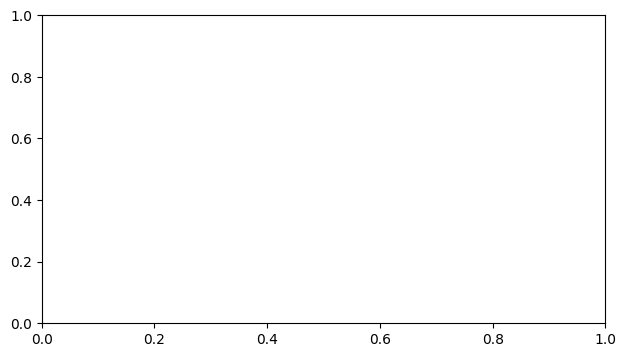

In [26]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.plot(history_train[0], label='train')
ax.plot(history_test[0], label='test')
ax.set_title('График точности "Accuracy"')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
ax.grid(True)

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(121)
ax.plot(history_train[1], label='train')
ax.plot(history_test[1], label='test')
ax.set_title('График функции потерь')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'test'], loc='upper left')
ax.grid(True)

plt.show()